# Ford GoBike System Data exploration
## by Amr Mohamed

## Preliminary Wrangling

> The Ford GoBike System dataset is a dataset of individual rides made in a bike-sharing system covering the greater San Francisco Bay area over a period of month (February 2019), the dataset consists of approximately 185k rows and 16 columns.

In [2]:
# import all packages and set plots to be embedded inline
# Dataset link: https://www.kaggle.com/chirag02/ford-gobike-2019feb-tripdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#loading the data set and cheking the first few lines
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
df.shape

(183412, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
#we add column age to get the users age
df['age']=2019-df.member_birth_year
df.age.head()

0    35.0
1     NaN
2    47.0
3    30.0
4    45.0
Name: age, dtype: float64

### What is the structure of your dataset?

> The dataset consists of 183412 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are the starting station name, end station name, gender, member birthdate, user type, start time , and end time

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that I think will help me investigating the data are the starting station name, end station name, gender, user type, start time , and end time

## Univariate Exploration

In [8]:
#we choose to drop columns with none values as they are relatvely few compare to the size of the dataset
df=df.dropna()

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000


>In the previous cell we can see that the maximum value of duration in seconds is around 23 hours, and the minimum birthdate is in 1878 so we begin our univariate by plotting histograms to see how treat the outliers

In [10]:
#function to polish the graphs
def plot_info(title,xlabel,ylabel):
    return plt.title(title),plt.xlabel(xlabel),plt.ylabel(ylabel);

### What is the distribution of the year of birth of all the users?

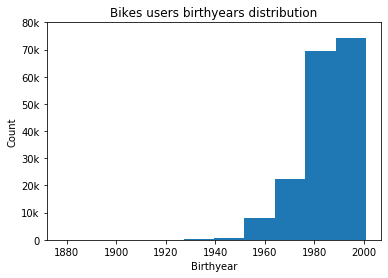

In [11]:

plt.hist(df.member_birth_year)
plot_info('Bikes users birthyears distribution','Birthyear','Count');
plt.yticks([0,10000,20000,30000,40000,50000,60000,70000,80000],['0','10k','20k','30k','40k','50k','60k','70k','80k']);

>In the prevous cell we can see that the graph is left skewed, and that just one bin is above the peek, so we apply larger count of bins to see the distribution better

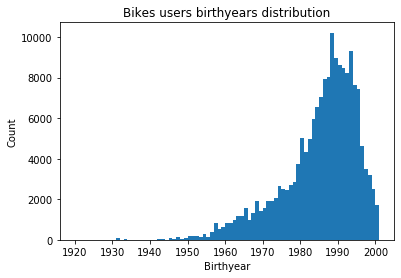

In [12]:
bins=np.arange(1920,df.member_birth_year.max()+1,1)
plt.hist(df.member_birth_year,bins=bins)
plot_info('Bikes users birthyears distribution','Birthyear','Count');

> after applying bins of size 1 to represent each birthyear, we can see that the graph is more normally distributed than left skewed, and tha there are some points below 1900, and on 1900 so we check wethr theses outliers are right or were incorrectly recorded

### What is the age distribution of the users?

The average of the users age is:  34.196865425945404


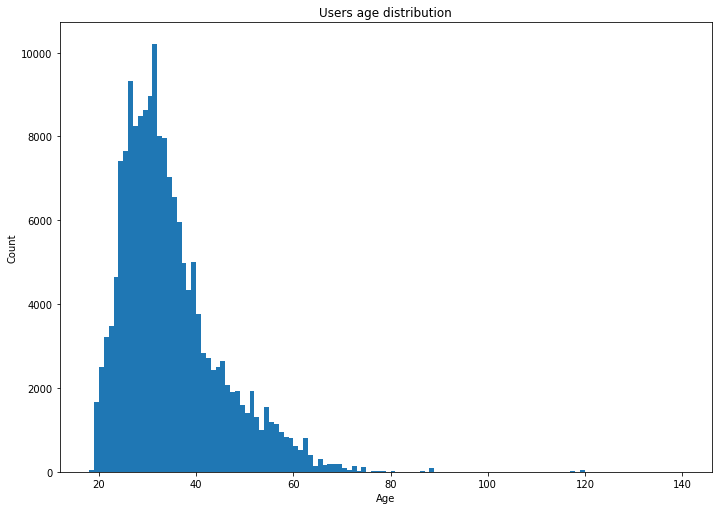

In [13]:
bins=np.arange(df.age.min(),df.age.max(),1)
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(df.age,bins=bins);
plot_info('Users age distribution','Age','Count');
print('The average of the users age is: ',df.age.mean())

>In the previous graph, we can see that most that the graph tend to be normaly distribute more than being right skewed, and the average age of users is around 34 years old

In [14]:
print(df[df.member_birth_year==1900].shape[0])
print(df[df.member_birth_year<1900].shape[0])

53
1


>In the previous cell we found that 53 users have birthdates 53 and most probably that is because they applied the default choice, and one user born in 1878, so we remove the rows with birthdates below 1901

In [15]:
df=df[df.member_birth_year>1901]

### How does the duration of the trip distribution looks like?

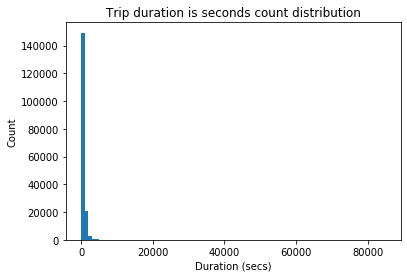

In [16]:
bins=np.arange(0,df.duration_sec.max()+1000,1000)
plt.hist(df.duration_sec,bins=bins);
plot_info('Trip duration is seconds count distribution','Duration (secs)','Count');

>we here can see that most of the trips are concentrated between 0 and 20000 secs, we apply the x axis upper bound to have a better look on those trips.

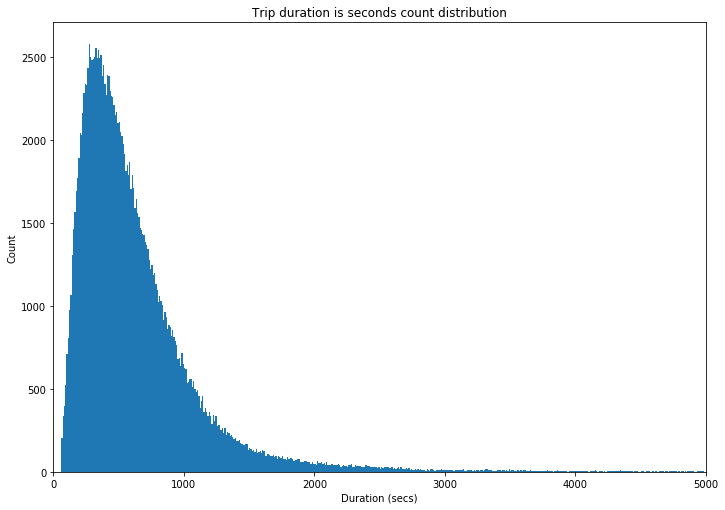

In [17]:
bins=np.arange(0,df.duration_sec.max()+10,10)
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(df.duration_sec,bins=bins);
plt.xlim(right=5000,left=0);
plot_info('Trip duration is seconds count distribution','Duration (secs)','Count');

>after applying the x axis upper bound, we can clearly see that the spike of most completed trips is between 0 and 1000.

In [18]:
df[df.duration_sec>45000].duration_sec.count()

78

In [19]:
df=df[df.duration_sec<45001]

after few data wrangling steps and google searching on the average bicycle rental time, we took the decision to remove trips with more than 12 hours because most probably they are incorrectly recorded, and are few so that their removal won't affect the data

### What is the count and ratio of the different genders?

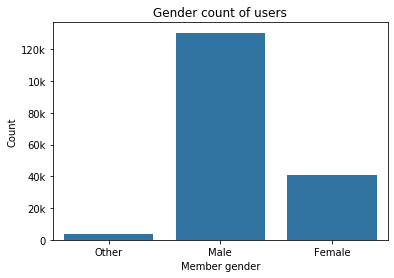

In [20]:
color=sb.color_palette()[0]
sb.countplot(data=df,x='member_gender',color=color);
plt.yticks([0,20000,40000,60000,80000,100000,120000],['0','20k','40k','60k','80k','10k','120k']);
plot_info('Gender count of users','Member gender','Count');

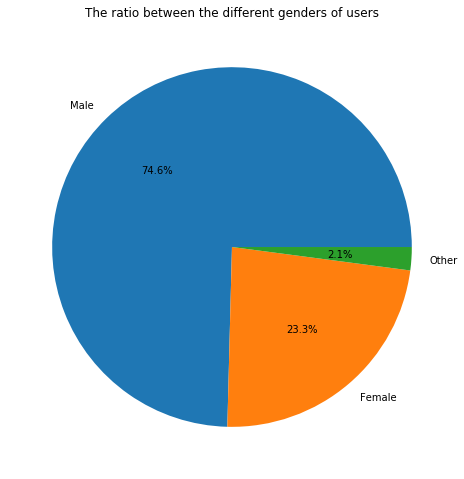

In [21]:
plt.figure(figsize=[ 11.69, 8.27])
df.member_gender.value_counts().plot(kind='pie',autopct='%1.1f%%');

plot_info('The ratio between the different genders of users','','');

>from the previous graph we can see that males users proportion is significantly high compared to females users proportion.

In [22]:
df[df.member_gender=='Other'].count()

duration_sec               3639
start_time                 3639
end_time                   3639
start_station_id           3639
start_station_name         3639
start_station_latitude     3639
start_station_longitude    3639
end_station_id             3639
end_station_name           3639
end_station_latitude       3639
end_station_longitude      3639
bike_id                    3639
user_type                  3639
member_birth_year          3639
member_gender              3639
bike_share_for_all_trip    3639
age                        3639
dtype: int64

###  What is the time interval on which this data was collected and what is the trip distribution on the interval?

In [23]:
df.start_time=pd.to_datetime(df.start_time)
print((df.start_time).min())
print((df.start_time).max())

2019-02-01 00:00:20.636000
2019-02-28 23:59:18.548000


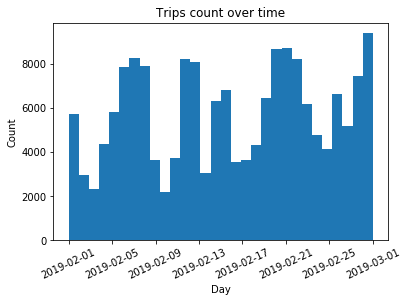

In [24]:
plt.hist(df.start_time,bins=30);
plt.xticks(rotation=25);
plot_info('Trips count over time','Day','Count');

### On which weekdays do users use the bikes?

In [25]:
df["weekday"] = df["start_time"].dt.weekday

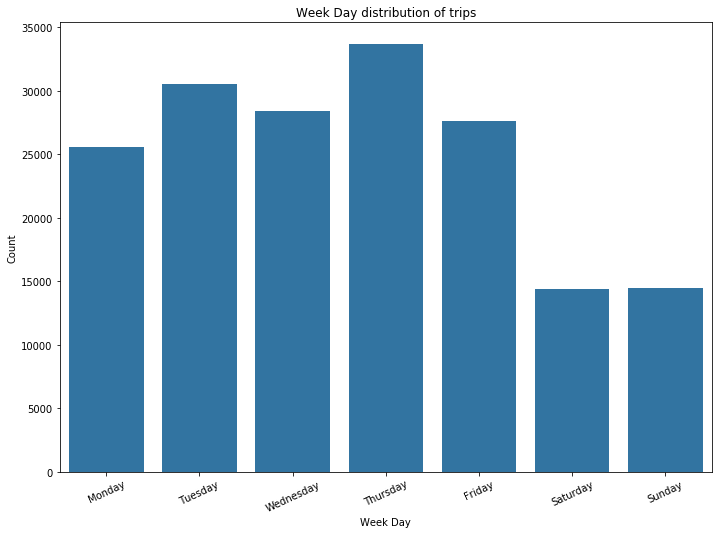

In [26]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.countplot(df["weekday"],color=color);

plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],rotation=25);
plot_info('Week Day distribution of trips','Week Day','Count');

From the previous graph we can see that on the weekend users use bikes much less times than on weekdays

>here we chose 30 bins as we saw that this data was collected over a period of a month (i.e: approximately 30 days)

In [27]:
df.end_time=pd.to_datetime(df.end_time)
print((df.end_time).min())
print((df.end_time).max())

2019-02-01 00:04:52.058000
2019-03-01 04:02:36.842000


### What are the top 10 used bike start and end stations?

In [28]:
top_10_start_stations=(df.start_station_name.value_counts()[:10].index)
top_10_start_stations=df[df.start_station_name.isin(list(top_10_start_stations))]

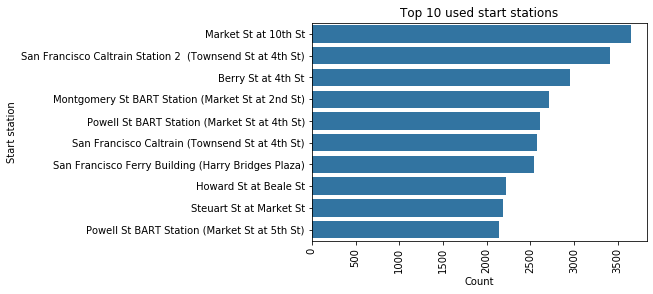

In [29]:
order=top_10_start_stations.start_station_name.value_counts().index
sb.countplot(y=top_10_start_stations.start_station_name,color=color,order=order);
plt.xticks(rotation=90)
plot_info('Top 10 used start stations','Count','Start station');

In [30]:
top_10_end_stations=(df.end_station_name.value_counts()[:10].index)
top_10_end_stations=df[df.end_station_name.isin(list(top_10_end_stations))]

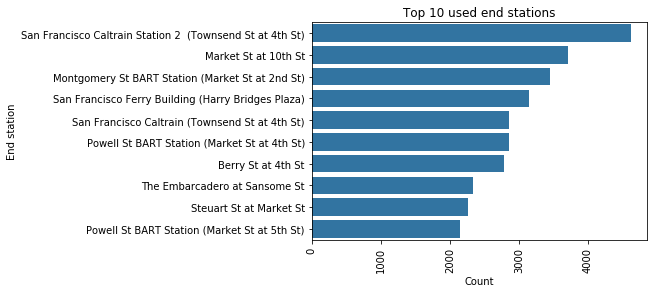

In [31]:
order=top_10_end_stations.end_station_name.value_counts().index
sb.countplot(y=top_10_end_stations.end_station_name,color=color,order=order);
plt.xticks(rotation=90)
plot_info('Top 10 used end stations','Count','End station');

>from the previous 2 bar charts of the start and end stations, we can see that the most used stations are in a street called Market St

### What is the count and ratio between subscriber users and customer users?

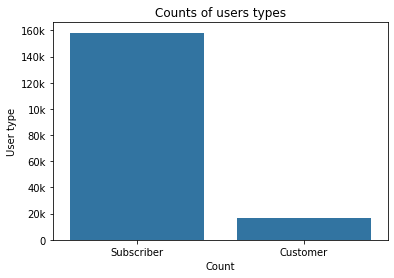

In [32]:
sb.countplot(df.user_type,color=color);
plot_info('Counts of users types','Count','User type');
plt.yticks([0,20000,40000,60000,80000,100000,120000,140000,160000],['0','20k','40k','60k','80k','10k','120k','140k','160k']);

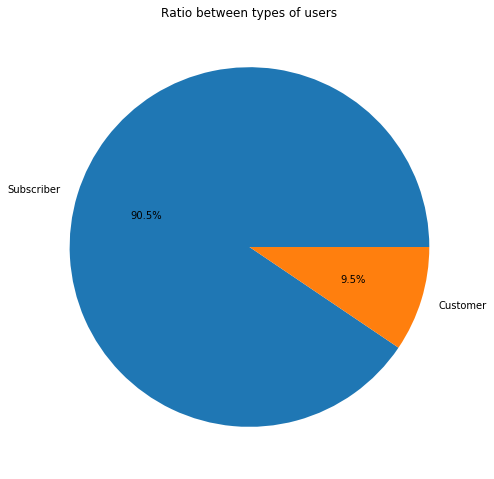

In [33]:
plt.figure(figsize=[ 11.69, 8.27]);
df.user_type.value_counts().plot(kind='pie',autopct='%1.1f%%');

plot_info('Ratio between types of users','','');

>from the previous graph we can see that subscriers ratio to customer is significantly high with a ratio of 9:1

### What is the most used track by te users?

In [34]:
df['track']=df.start_station_name+'--->'+df.end_station_name

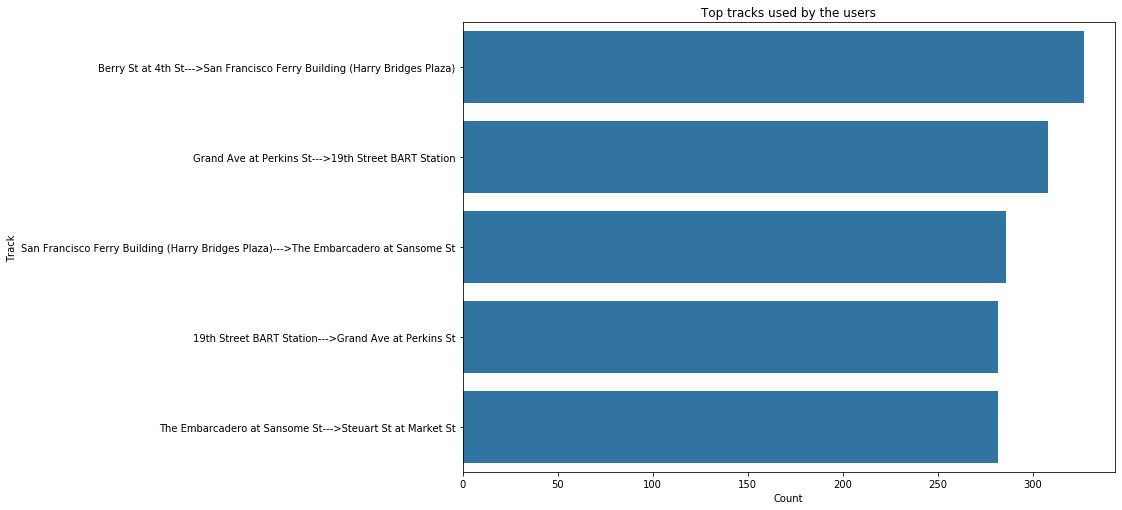

In [35]:
top_tracks=df.track.value_counts()[:5].index
top_tracks_df=df[df.track.isin(list(top_tracks))]
plt.figure(figsize=[ 11.69, 8.27]);
sb.countplot(y=top_tracks_df.track,color=color,order=top_tracks);
plot_info('Top tracks used by the users','Count','Track');

### What is the age distribution of the users who take one or more of the top 5 used paths?

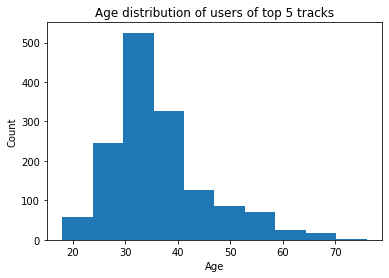

In [36]:
plt.hist(top_tracks_df.age);
plot_info('Age distribution of users of top 5 tracks','Age','Count');

>In the previous 2 cells, we plotted the top 5 tracks that users use, and the distribution of the age of the users who use these tracks

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> What is interesting about the categorical variables user gender and user type is the significant difference between the items, for example the difference between male and female users.
>The unusal points we found, are in the duration column which has more than one unlogical outlier which seems to be falsely recorded, and the birthyear in which we found 52 user born on 1900, but there is a very high probability that they applied the default choices, and there is also a user registered as born in 1878 which is not logically so we removed these rows as they are few and seem to be falsely recorded

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only unusual distribution is that of the duration, as it has a very long tail, we applied the log distribution to x-axis to treat this issue, but it wasn't informative, so we removed it and treated the outliers of duration by removing the rows with duration more than 12 hours because they aren't logically and are few so that they won't affect our analysis 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [37]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'weekday', 'track'],
      dtype='object')

In [38]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,weekday,track
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,3,Grove St at Masonic Ave--->Central Ave at Fell St
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,3,Frank H Ogawa Plaza--->10th Ave at E 15th St
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,3,4th St at Mission Bay Blvd S--->Broadway at Ke...
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,36.0,3,Palm St at Willow St--->San Jose Diridon Station
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,30.0,3,Washington St at Kearny St--->Valencia St at 2...


In [39]:
#we take subset of the dataset of rows with gender equal to male or female only
sub1=df[df.member_gender.isin(["Male","Female"])]

In [40]:
df.corr()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,weekday
duration_sec,1.000000,-0.008273,0.014966,-0.058965,0.003284,0.016227,-0.059570,0.018671,-0.016161,0.016161,0.042216
start_station_id,-0.008273,1.000000,-0.195612,0.465427,0.340221,-0.184532,0.472610,-0.068257,0.118943,-0.118943,0.053713
start_station_latitude,0.014966,-0.195612,1.000000,-0.678374,-0.184700,0.990133,-0.683813,0.051199,-0.075168,0.075168,-0.008087
start_station_longitude,-0.058965,0.465427,-0.678374,1.000000,0.485997,-0.682862,0.992518,-0.144033,0.127136,-0.127136,0.014904
end_station_id,0.003284,0.340221,-0.184700,0.485997,1.000000,-0.202692,0.475658,-0.056806,0.114805,-0.114805,0.052947
end_station_latitude,0.016227,-0.184532,0.990133,-0.682862,-0.202692,1.000000,-0.685346,0.050570,-0.075294,0.075294,-0.007855
end_station_longitude,-0.059570,0.472610,-0.683813,0.992518,0.475658,-0.685346,1.000000,-0.145862,0.128094,-0.128094,0.014515
bike_id,0.018671,-0.068257,0.051199,-0.144033,-0.056806,0.050570,-0.145862,1.000000,0.037176,-0.037176,0.040890
member_birth_year,-0.016161,0.118943,-0.075168,0.127136,0.114805,-0.075294,0.128094,0.037176,1.000000,-1.000000,0.034895
age,0.016161,-0.118943,0.075168,-0.127136,-0.114805,0.075294,-0.128094,-0.037176,-1.000000,1.000000,-0.034895


### What is the relation between age and duration (secs)?

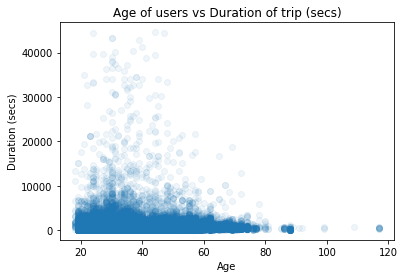

In [41]:
sb.regplot(data=df,x='age',y='duration_sec',scatter_kws={'alpha':1/15},fit_reg=False);
plot_info('Age of users vs Duration of trip (secs)','Age','Duration (secs)');

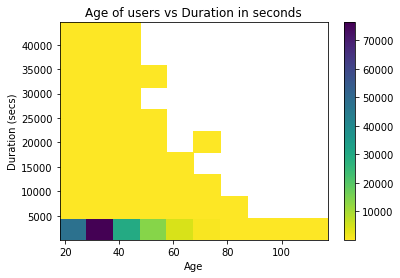

In [42]:
plt.hist2d(data=df,x='age',y='duration_sec', cmin=0.5, cmap='viridis_r');
plt.colorbar();
plot_info('Age of users vs Duration in seconds','Age','Duration (secs)');

>In the previous graphs, we can see that most of the trips have duration less than 5000 seconds regardless the age of the user

### What is the count of each gender for both user types?

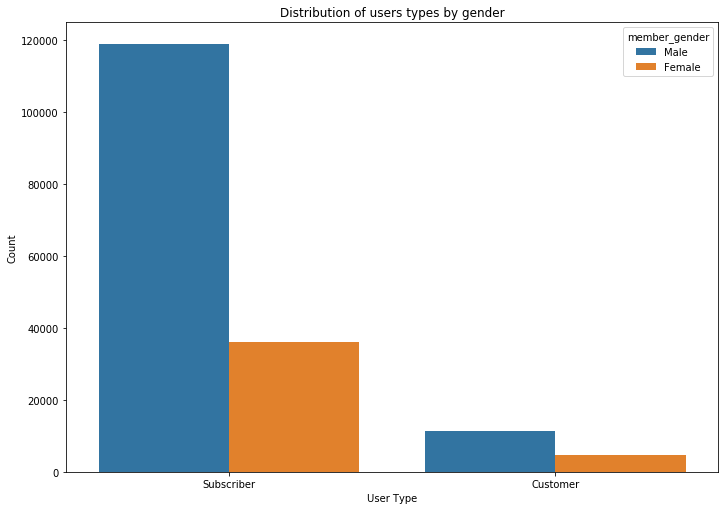

In [43]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.countplot(data = sub1, x = 'user_type', hue = 'member_gender');
plot_info('Distribution of users types by gender',"User Type",'Count');

>In the previous graph we can see that the ratios of the genders is the same regardless the user is a subscriber or a customer

### What is the relation between the user gender and age?

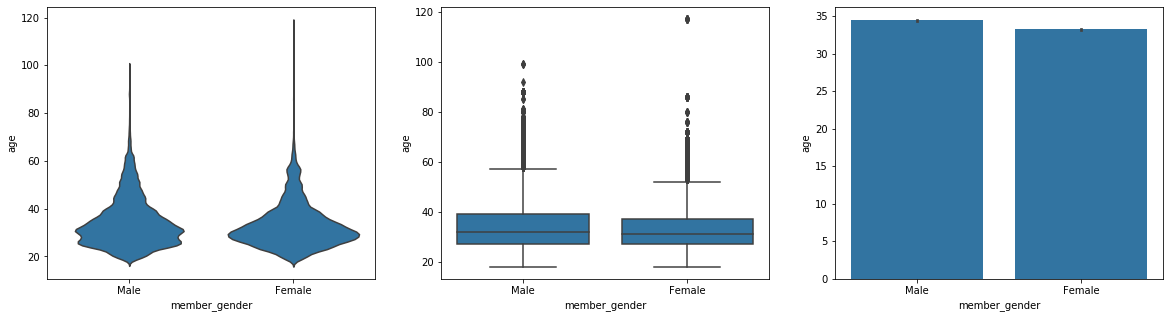

In [44]:
plt.figure(figsize = [20, 5])
# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=sub1, x='member_gender', y='age', inner = None,
              color = color);
# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=sub1, x='member_gender', y='age', color = color);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=sub1, x='member_gender', y='age', color = color);

>Here we can see that the male users age distibution seems to be bimodal while the female users age distribution seems to be normally distributed, we can also see in the box plot, that the maximum age of a user is an outlier of the females.

### What is the relation between the user type and age?

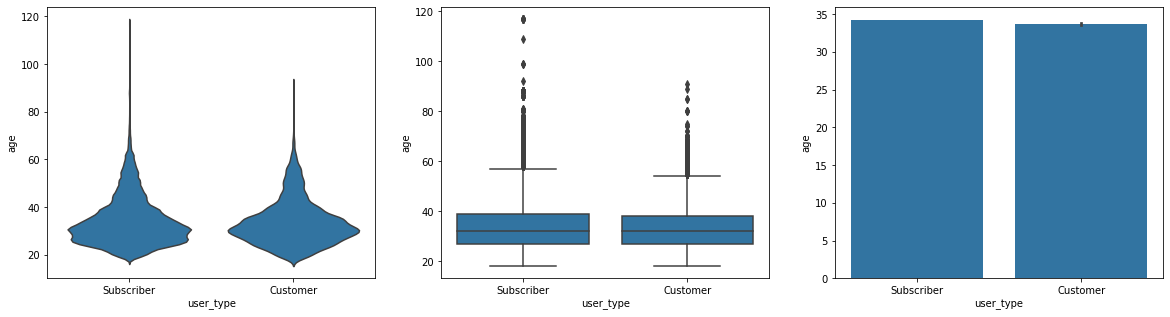

In [45]:
plt.figure(figsize = [20, 5])
# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='user_type', y='age', inner = None,
              color = color)
# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='user_type', y='age', color = color)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='user_type', y='age', color = color);

Here we can see that the subscribers age distibution seems to be bimodal while the customers users age distribution seems to be normally distributed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As we can see from the first scatterplot, a big proportion of the trips done have duration less than 5000 seconds for all ages.
> Male to female ratio is almost the same for both subscribers and customers.
> The male subscribes age distribution seems to be bimodal from the violinplot while for females it seems to be normally distributed

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A very intresting observation is about the violin plots of age vs user_type and age vs user gender have approximately the same distributions of the violin plot 

## Multivariate Exploration

### What is the relation between the users gender and duration for both user types?

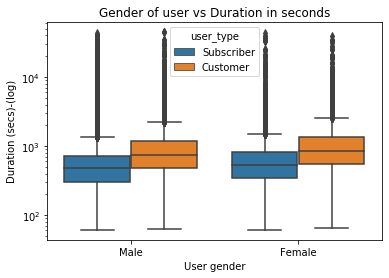

In [46]:
sb.boxplot(data=sub1,x='member_gender',y='duration_sec',hue='user_type');
plt.yscale('log')
plot_info('Gender of user vs Duration in seconds','User gender','Duration (secs)-(log)');

>After appying the logarithmic scale to the y-axis, we can see now that both genders has the same medians and ranges of the duration of the trip, regardless the user type.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


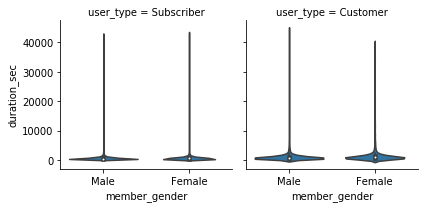

In [47]:
g=sb.FacetGrid(data=sub1, col='user_type')
g.map(sb.violinplot,'member_gender','duration_sec');

>we plot a violin plot to help us see the distribution

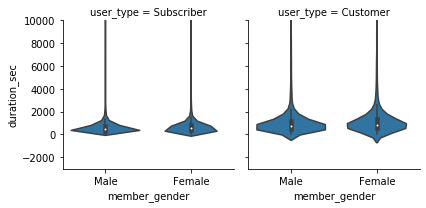

In [48]:
g=sb.FacetGrid(data=sub1, col='user_type')
g.map(sb.violinplot,'member_gender','duration_sec');
plt.ylim(top=10000);

>After setting a limit for the y-axis to help us better see the distribution of the data, we can see that for customers , the duration distribution is wider for both genders than the subscriber users

### What is the relation between user age and the duration in seconds for both user types?

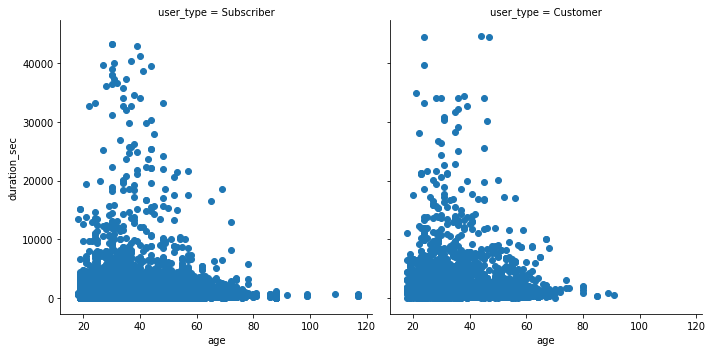

In [49]:
g=sb.FacetGrid(data=df, col='user_type',height=5,aspect=1)
g.map(plt.scatter,'age','duration_sec');

> In the previous graphs we can see a similar relation between the age and the duration for both types of users

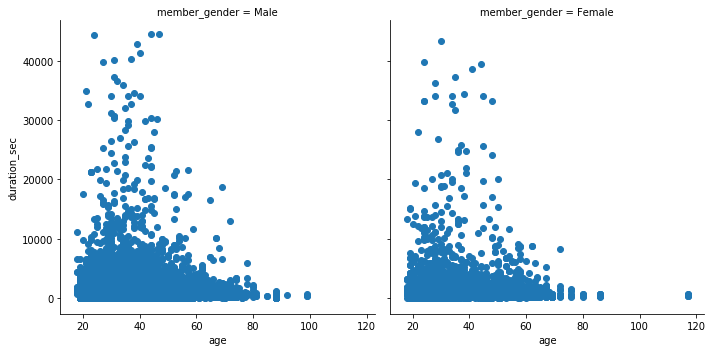

In [50]:
g=sb.FacetGrid(data=sub1, col='member_gender',height=5,aspect=1)
g.map(plt.scatter,'age','duration_sec');

>In the previous graphs we can see a similar relation between the age and the duration for both gender of users

### What is the relation between the users gender and duration for both user types?

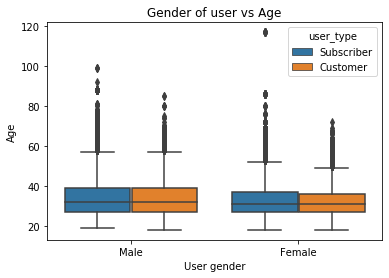

In [51]:
sb.boxplot(data=sub1,x='member_gender',y='age',hue='user_type');
plot_info('Gender of user vs Age','User gender','Age');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


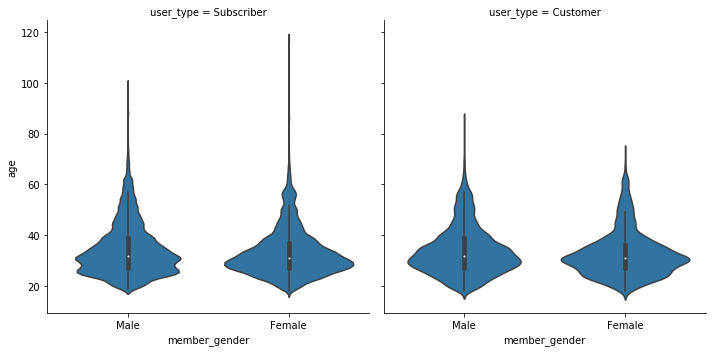

In [52]:
g=sb.FacetGrid(data=sub1, col='user_type',height=5,aspect=1)
g.map(sb.violinplot,'member_gender','age');

from the previous graphs, we can see in the box plot that male users has approximately the same range of ages, while for female users, subscriber females seem to have higher range than customer users

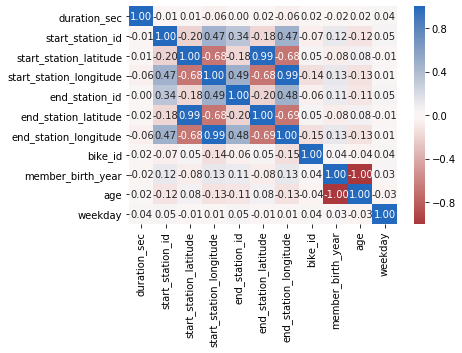

In [53]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

>from the previous heatmap, the only uncommon relationship is for age and year of birth as we got the age column by substracting it from 2019 value, so it show a strong negative relationship, and also we made sure that there is no more interesting relations to explore

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>The duration distribution is wider for both genders than the subscriber users. We can see a similar relation between the age and the duration for both types of users. We can see a similar relation between the age and the duration for both gender of users. the only uncommon relationship is for age and year of birth as we got the age column by substracting it from 2019 value, so it show a strong negative relationship.

### Were there any interesting or surprising interactions between features?

>  We can see in the box plot and violin plot from question 16 that male users has approximately the same range of ages, while for female users, subscriber females seem to have higher range than customer users The only uncommon relationship is for age and year of birth as we got the age column by substracting it from 2019 value, so it show a strong negative relationship.